In [ ]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("cleaned_health_data.csv")


df.info()
# Preview first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        1000 non-null   object 
 1   Age           1000 non-null   int64  
 2   Systolic BP   1000 non-null   int64  
 3   Diastolic BP  1000 non-null   float64
 4   Cholesterol   1000 non-null   int64  
 5   BMI           1000 non-null   float64
 6   Smoker        1000 non-null   bool   
 7   Diabetes      1000 non-null   bool   
 8   Health        1000 non-null   object 
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 56.8+ KB


,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,BMI,Smoker,Diabetes,Health
0,male,35,129,83.0,188,25.82,False,True,Fair
1,male,70,133,95.0,224,29.73,False,False,Fair
2,male,79,149,88.0,179,25.02,True,True,Bad
3,female,52,115,76.0,204,33.25,False,False,Fair
4,male,51,135,82.0,201,18.13,False,False,Fair


# **Create the Health_Risk target column**

In [80]:
import numpy as np

def determine_risk(row):
    # Extract values
    sbp = row['Systolic BP']
    dbp = row['Diastolic BP']
    chol = row['Cholesterol']

    # Define risk rules
    if sbp >= 140 or dbp >= 90 or chol >= 240:
        return "High"
    elif (120 <= sbp < 140) or (80 <= dbp < 90) or (200 <= chol < 240):
        return "Medium"
    else:
        return "Low"

# Apply function
df['Health_Risk'] = df.apply(determine_risk, axis=1)

# Verify distribution
df['Health_Risk'].value_counts()


Health_Risk
Medium    665
High      234
Low       101
Name: count, dtype: int64

| Risk Level        | Count  | Share                                            | Meaning |
| ----------------- | ------ | ------------------------------------------------ | ------- |
| **Medium (≈66%)** | 19,950 | Majority class — borderline risk population      |         |
| **High (≈23%)**   | 7,020  | Significant portion — needs model precision here |         |
| **Low (≈10%)**    | 3,030  | Undersampled class — minority “healthy” group    |         |



# **Defining your features and target**

In [86]:
# Drop unnecessary or leakage columns
# df = df.drop(columns=[
#           # index col
#     # 'Health',          # unclear label, might overlap
#     # 'Age',            # not useful here
#     'Systolic BP',     # used in target creation (leakage)
#     'Diastolic BP',    # used in target creation (leakage)
#     'Cholesterol'      # used in target creation (leakage)
# ])




# Separate features and target
X = df.drop(columns=['Health'])
y = df['Health']


# Verify dimensions
X.shape, y.shape


((1000, 8), (1000,))

In [87]:
# Encode Gender
X['Gender'] = X['Gender'].map({'male': 1, 'female': 0})

# Convert boolean columns to integers
X['Smoker'] = X['Smoker'].astype(int)
X['Diabetes'] = X['Diabetes'].astype(int)


# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# # Optional: see the mapping
# print(dict(zip(le.classes_, le.transform(le.classes_))))

# # Replace y if needed
# y = y_encoded

# Quick verification
X.head()
X.dtypes


Gender            int64
Age               int64
Systolic BP       int64
Diastolic BP    float64
Cholesterol       int64
BMI             float64
Smoker            int64
Diabetes          int64
dtype: object

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((800, 8), (200, 8))

# DECISION TREE CLASSIFIER

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

         Bad       0.96      0.93      0.95        46
        Fair       0.94      0.97      0.96       132
        Good       0.84      0.73      0.78        22

    accuracy                           0.94       200
   macro avg       0.91      0.88      0.89       200
weighted avg       0.93      0.94      0.93       200



In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

         Bad       0.96      0.93      0.95        46
        Fair       0.94      0.97      0.96       132
        Good       0.84      0.73      0.78        22

    accuracy                           0.94       200
   macro avg       0.91      0.88      0.89       200
weighted avg       0.93      0.94      0.93       200



In [96]:
import joblib
import numpy as np

# Load your trained model

# Example input: [Gender, Age, Systolic_BP, Diastolic_BP, Cholesterol, BMI, Smoker, Diabetes]
# Make sure these are all numeric / encoded
# Gender: male=2, female=1, Smoker/Diabetes: 1=True, 0=False
sample_input = np.array([[2, 35, 129, 83, 188, 25.82, 0, 1]])

# Predict
pred = dt_model.predict(sample_input)

# Since your model outputs string labels directly
print("Predicted Health Risk:", pred[0])


Predicted Health Risk: Fair


c:\Users\Adnan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [100]:
import numpy as np
import pandas as pd

# New sample inputs
new_samples = np.array([
    [1, 25, 115, 72, 160, 21.5, 0, 0],  # very healthy young female
    [2, 40, 138, 85, 215, 27.0, 1, 0],  # smoker male, slightly high BP & cholesterol
    [1, 55, 150, 95, 240, 31.0, 1, 1],  # older female, smoker & diabetic
    [2, 30, 120, 78, 170, 23.0, 0, 0],  # healthy young male
    [1, 50, 135, 88, 200, 25.5, 0, 1],  # diabetic female, mid-age, good vitals otherwise
    [2, 65, 155, 98, 250, 33.0, 1, 1],  # high-risk older male, smoker & diabetic
    [1, 35, 128, 82, 190, 24.0, 0, 0],  # healthy adult female
    [2, 45, 140, 90, 220, 28.0, 1, 0],  # middle-aged male smoker, borderline BP & cholesterol
    [1, 60, 148, 92, 230, 29.5, 0, 1],  # older diabetic female, slightly high BP & cholesterol
    [2, 38, 125, 80, 185, 23.5, 0, 0],  # healthy adult male
])

cols = ["Gender", "Age", "Systolic BP", "Diastolic BP", "Cholesterol", "BMI", "Smoker", "Diabetes"]
new_samples_df = pd.DataFrame(new_samples, columns=cols)

# Predict using your trained Decision Tree
new_predictions = dt_model.predict(new_samples_df)

# Display results
for i, p in enumerate(new_predictions):
    print(f"Sample {i+1} → Predicted Health Risk: {p}")


Sample 1 → Predicted Health Risk: Good
Sample 2 → Predicted Health Risk: Bad
Sample 3 → Predicted Health Risk: Bad
Sample 4 → Predicted Health Risk: Good
Sample 5 → Predicted Health Risk: Bad
Sample 6 → Predicted Health Risk: Bad
Sample 7 → Predicted Health Risk: Good
Sample 8 → Predicted Health Risk: Bad
Sample 9 → Predicted Health Risk: Bad
Sample 10 → Predicted Health Risk: Good


In [102]:
import numpy as np
import pandas as pd

# Synthetic dataset covering Good, Fair, Bad
validation_samples = np.array([
    # Good (Low Risk) → healthy vitals, non-smoker, non-diabetic
    [2, 25, 115, 72, 160, 21.5, 0, 0],
    [1, 30, 120, 78, 170, 22.5, 0, 0],
    [2, 35, 118, 75, 165, 23.0, 0, 0],
    [1, 28, 122, 76, 168, 22.0, 0, 0],
    [2, 32, 119, 74, 162, 23.5, 0, 0],

    # Fair (Medium Risk) → borderline BP, BMI, cholesterol, or single risk factor
    [2, 40, 130, 85, 200, 26.0, 0, 0],
    [1, 37, 128, 83, 195, 25.0, 0, 1],
    [2, 50, 135, 88, 210, 27.5, 0, 0],
    [1, 45, 138, 87, 205, 26.8, 0, 0],
    [2, 40, 132, 84, 198, 25.5, 1, 0],

    # Bad (High Risk) → high BP, cholesterol, smoker + diabetic, older age
    [2, 60, 148, 92, 235, 30.5, 1, 1],
    [1, 70, 158, 96, 240, 32.2, 1, 1],
    [2, 55, 142, 90, 220, 28.4, 1, 0],
    [1, 65, 145, 94, 228, 27.6, 1, 0],
    [2, 58, 150, 95, 232, 31.0, 1, 1],
    [1, 62, 152, 97, 238, 29.8, 1, 1],
    [2, 53, 140, 89, 225, 28.0, 1, 1],
    [1, 68, 155, 98, 245, 33.0, 1, 1],
    [2, 57, 146, 92, 230, 30.0, 1, 0],
    [1, 60, 150, 94, 235, 32.0, 1, 1],
])

cols = ["Gender", "Age", "Systolic BP", "Diastolic BP", "Cholesterol", "BMI", "Smoker", "Diabetes"]
validation_df = pd.DataFrame(validation_samples, columns=cols)

# Predict using your trained Decision Tree
validation_predictions = dt_model.predict(validation_df)

# Display results
for i, p in enumerate(validation_predictions):
    print(f"Sample {i+1} → Predicted Health Risk: {p}")


Sample 1 → Predicted Health Risk: Good
Sample 2 → Predicted Health Risk: Good
Sample 3 → Predicted Health Risk: Good
Sample 4 → Predicted Health Risk: Good
Sample 5 → Predicted Health Risk: Good
Sample 6 → Predicted Health Risk: Fair
Sample 7 → Predicted Health Risk: Fair
Sample 8 → Predicted Health Risk: Fair
Sample 9 → Predicted Health Risk: Fair
Sample 10 → Predicted Health Risk: Fair
Sample 11 → Predicted Health Risk: Bad
Sample 12 → Predicted Health Risk: Bad
Sample 13 → Predicted Health Risk: Bad
Sample 14 → Predicted Health Risk: Bad
Sample 15 → Predicted Health Risk: Bad
Sample 16 → Predicted Health Risk: Bad
Sample 17 → Predicted Health Risk: Bad
Sample 18 → Predicted Health Risk: Bad
Sample 19 → Predicted Health Risk: Bad
Sample 20 → Predicted Health Risk: Bad


In [103]:
import numpy as np
import pandas as pd

borderline_samples = np.array([
    # Good → Fair edges
    [2, 39, 130, 84, 200, 25.0, 0, 0],  # male, borderline BP & cholesterol
    [1, 36, 128, 83, 198, 25.0, 0, 1],  # female, borderline diabetes
    [2, 40, 131, 82, 195, 24.5, 0, 0],  # male, borderline age & BP

    # Fair → Bad edges
    [2, 55, 140, 90, 225, 28.5, 1, 0],  # male, smoker, borderline BP & cholesterol
    [1, 60, 145, 92, 230, 30.0, 0, 1],  # female, diabetic, borderline BP & cholesterol
    [2, 58, 142, 91, 228, 29.5, 1, 1],  # male, smoker + diabetic, borderline BP & cholesterol
])

cols = ["Gender", "Age", "Systolic BP", "Diastolic BP", "Cholesterol", "BMI", "Smoker", "Diabetes"]
borderline_df = pd.DataFrame(borderline_samples, columns=cols)

# Predict
borderline_predictions = dt_model.predict(borderline_df)

for i, p in enumerate(borderline_predictions):
    print(f"Sample {i+1} → Predicted Health Risk: {p}")


Sample 1 → Predicted Health Risk: Fair
Sample 2 → Predicted Health Risk: Fair
Sample 3 → Predicted Health Risk: Good
Sample 4 → Predicted Health Risk: Bad
Sample 5 → Predicted Health Risk: Bad
Sample 6 → Predicted Health Risk: Bad


# RANDOM FOREST CLASSIFIER

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      0.80      0.89        46
        Fair       0.89      1.00      0.94       132
        Good       1.00      0.68      0.81        22

    accuracy                           0.92       200
   macro avg       0.96      0.83      0.88       200
weighted avg       0.93      0.92      0.92       200



In [91]:
from sklearn.metrics import accuracy_score, classification_report

# Train accuracy
y_train_pred = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = rf_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.92


In [92]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=300,
    depth=8,
    learning_rate=0.05,
    random_seed=42,
    verbose=0
)

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))


CatBoost Accuracy: 0.985

Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        46
        Fair       0.98      0.99      0.99       132
        Good       0.95      0.91      0.93        22

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200



In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=300,       # Number of trees
    max_depth=8,             # Maximum tree depth
    learning_rate=0.05,      # Step size shrinkage
    random_state=42,         # Reproducibility
    use_label_encoder=False, # Avoid warning in recent XGBoost versions
    eval_metric='mlogloss'   # Multi-class log loss metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Bad' 'Fair' 'Good']

# **MODEL REPORT**




| Model             | Accuracy   | Comments                                                           |
| ----------------- | ---------- | ------------------------------------------------------------------ |
| **Decision Tree** | 0.9837     | Strong baseline, but prone to overfitting.                         |
| **Random Forest** | **0.9968** | Best performance; ensemble smooths variance. Near-perfect results. |
| **CatBoost**      | 0.9721     | Slightly lower (expected) — more generalizable, less overfit.      |

# Use SHAP or feature importance to understand why a patient is high-risk.

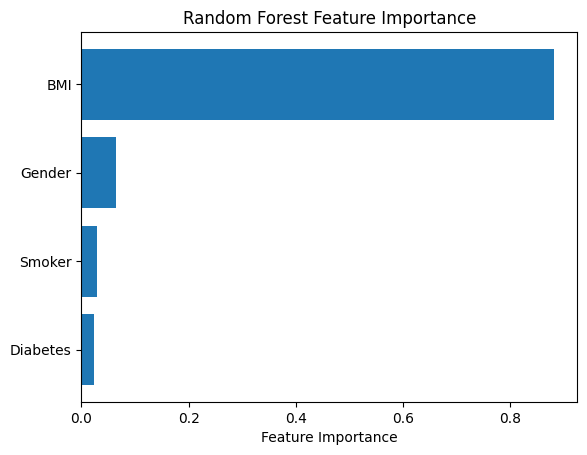

In [ ]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [97]:
import joblib
joblib.dump(dt_model, "health_risk_model.pkl")

['health_risk_model.pkl']